# Элементы статистики

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import random

from IPython.display import Image

## Нормальное распределение

In [5]:
sns.set_style('darkgrid')

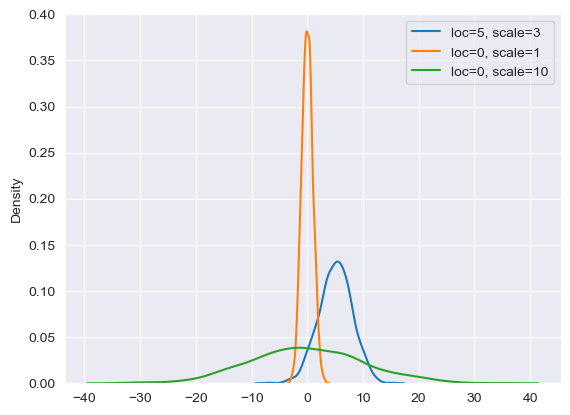

In [6]:
#kernel density estimate (KDE)
norm1 = np.random.normal(loc=5, scale=3, size=1000)
sns.kdeplot(norm1, label = 'loc=5, scale=3')

norm2 = np.random.normal(loc=0, scale=1, size=1000)
sns.kdeplot(norm2, label = 'loc=0, scale=1')

norm3 = np.random.normal(loc=0, scale=10, size=1000)
sns.kdeplot(norm3, label = 'loc=0, scale=10')

plt.legend()

## Правило 3х сигм

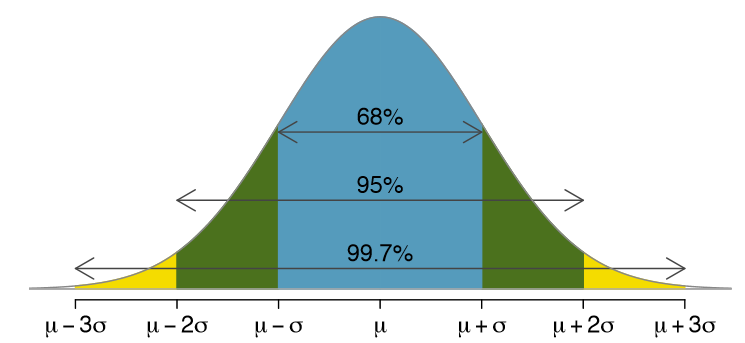

In [10]:
 Image(filename='images/3_sigma.png')

## Некоторые другие распределения

### Распределение Пуассона

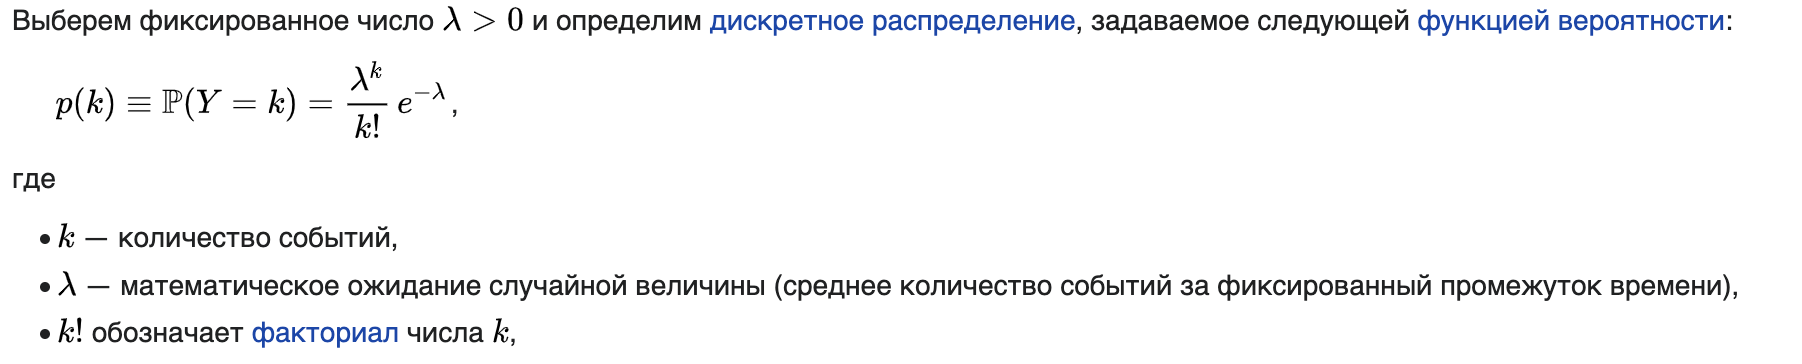

In [13]:
 Image(filename='images/pois_distr.png')

In [61]:
from math import factorial
# M = lambda, D = lambda

def poisson(lam, k):
    res = (lam**k/factorial(k))*np.exp(-lam)
    return res

In [72]:
xvalues = np.arange(0, 20)

yvalues_05 = [poisson(0.5, xvalue) for xvalue in xvalues]
yvalues_5 = [poisson(5, xvalue) for xvalue in xvalues]
yvalues_10 = [poisson(10, xvalue) for xvalue in xvalues]

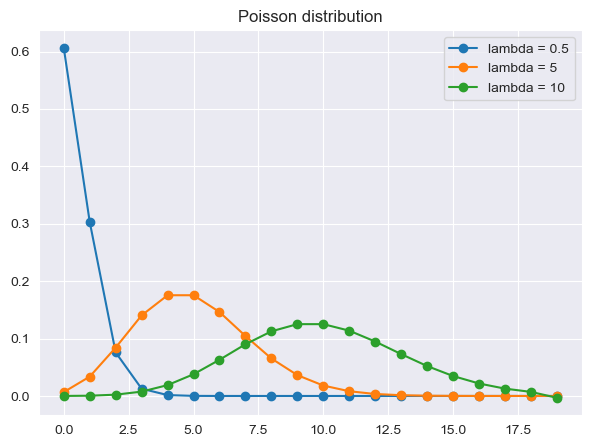

In [75]:
plt.plot(xvalues, yvalues_05, marker = 'o', label = 'lambda = 0.5')
plt.plot(xvalues, yvalues_5,  marker = 'o', label = 'lambda = 5')
plt.plot(xvalues, yvalues_10, marker = 'o', label = 'lambda = 10')

plt.legend()
plt.title('Poisson distribution')
plt.show()

### Экспоненциальное раcпределение

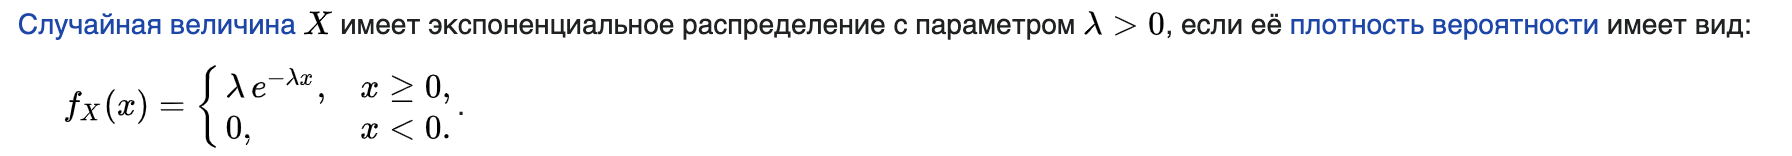

In [76]:
 Image(filename='images/exp_distr.png')

In [78]:
# M = 1/lambda, D = 1/lambda^2

def exp(lam, x):
    if x>=0:
        return lam*np.exp(-lam*x)
    else:
        return 0

In [85]:
xvalues = np.linspace(0, 1, 100)

yvalues_05 = [exp(0.5, xvalue) for xvalue in xvalues]
yvalues_5 = [exp(5, xvalue) for xvalue in xvalues]
yvalues_10 = [exp(10, xvalue) for xvalue in xvalues]

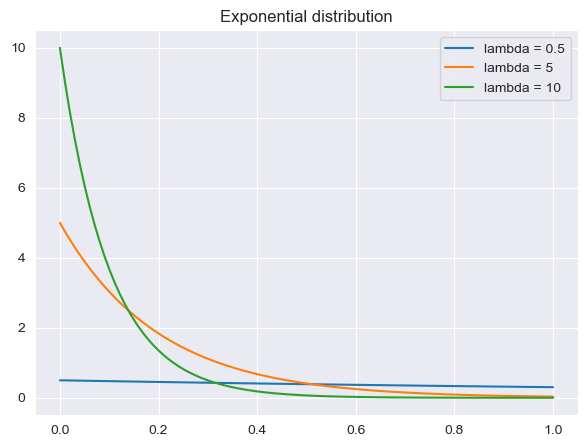

In [88]:
plt.plot(xvalues, yvalues_05, label = 'lambda = 0.5')
plt.plot(xvalues, yvalues_5,  label = 'lambda = 5')
plt.plot(xvalues, yvalues_10, label = 'lambda = 10')

plt.legend()
plt.title('Exponential distribution')
plt.show()

## Центральная предельная теорема (Central limit theorem) - ЦПТ

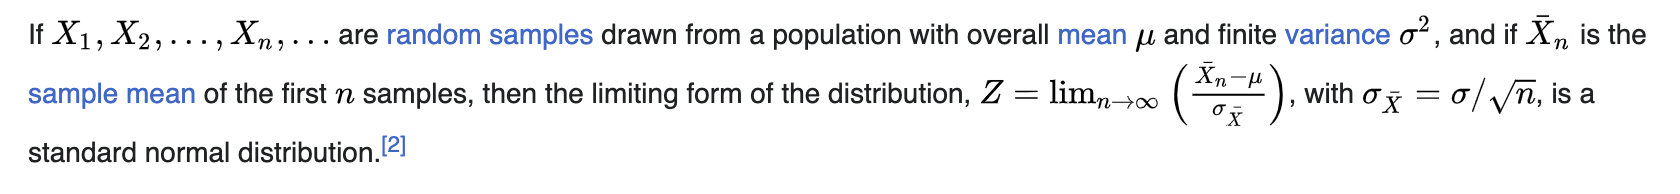

In [32]:
 Image(filename='images/clt.png') #https://en.wikipedia.org/wiki/Central_limit_theorem

### Проиллюстрируем утверждение ЦПТ

In [16]:
expd = np.random.exponential(scale = 0.5, size = 10000)

<AxesSubplot:ylabel='Count'>

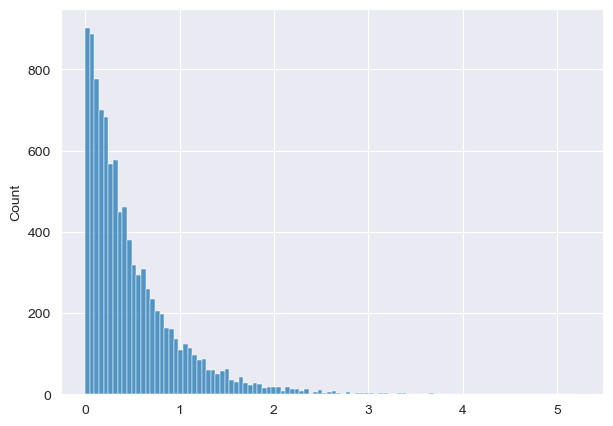

In [17]:
plt.rcParams["figure.figsize"] = (7,5)
sns.histplot(expd)

In [18]:
expd = []

for i in range(30):
    random.seed(i)
    expd.append(np.random.exponential(scale = 0.5, size = 15))

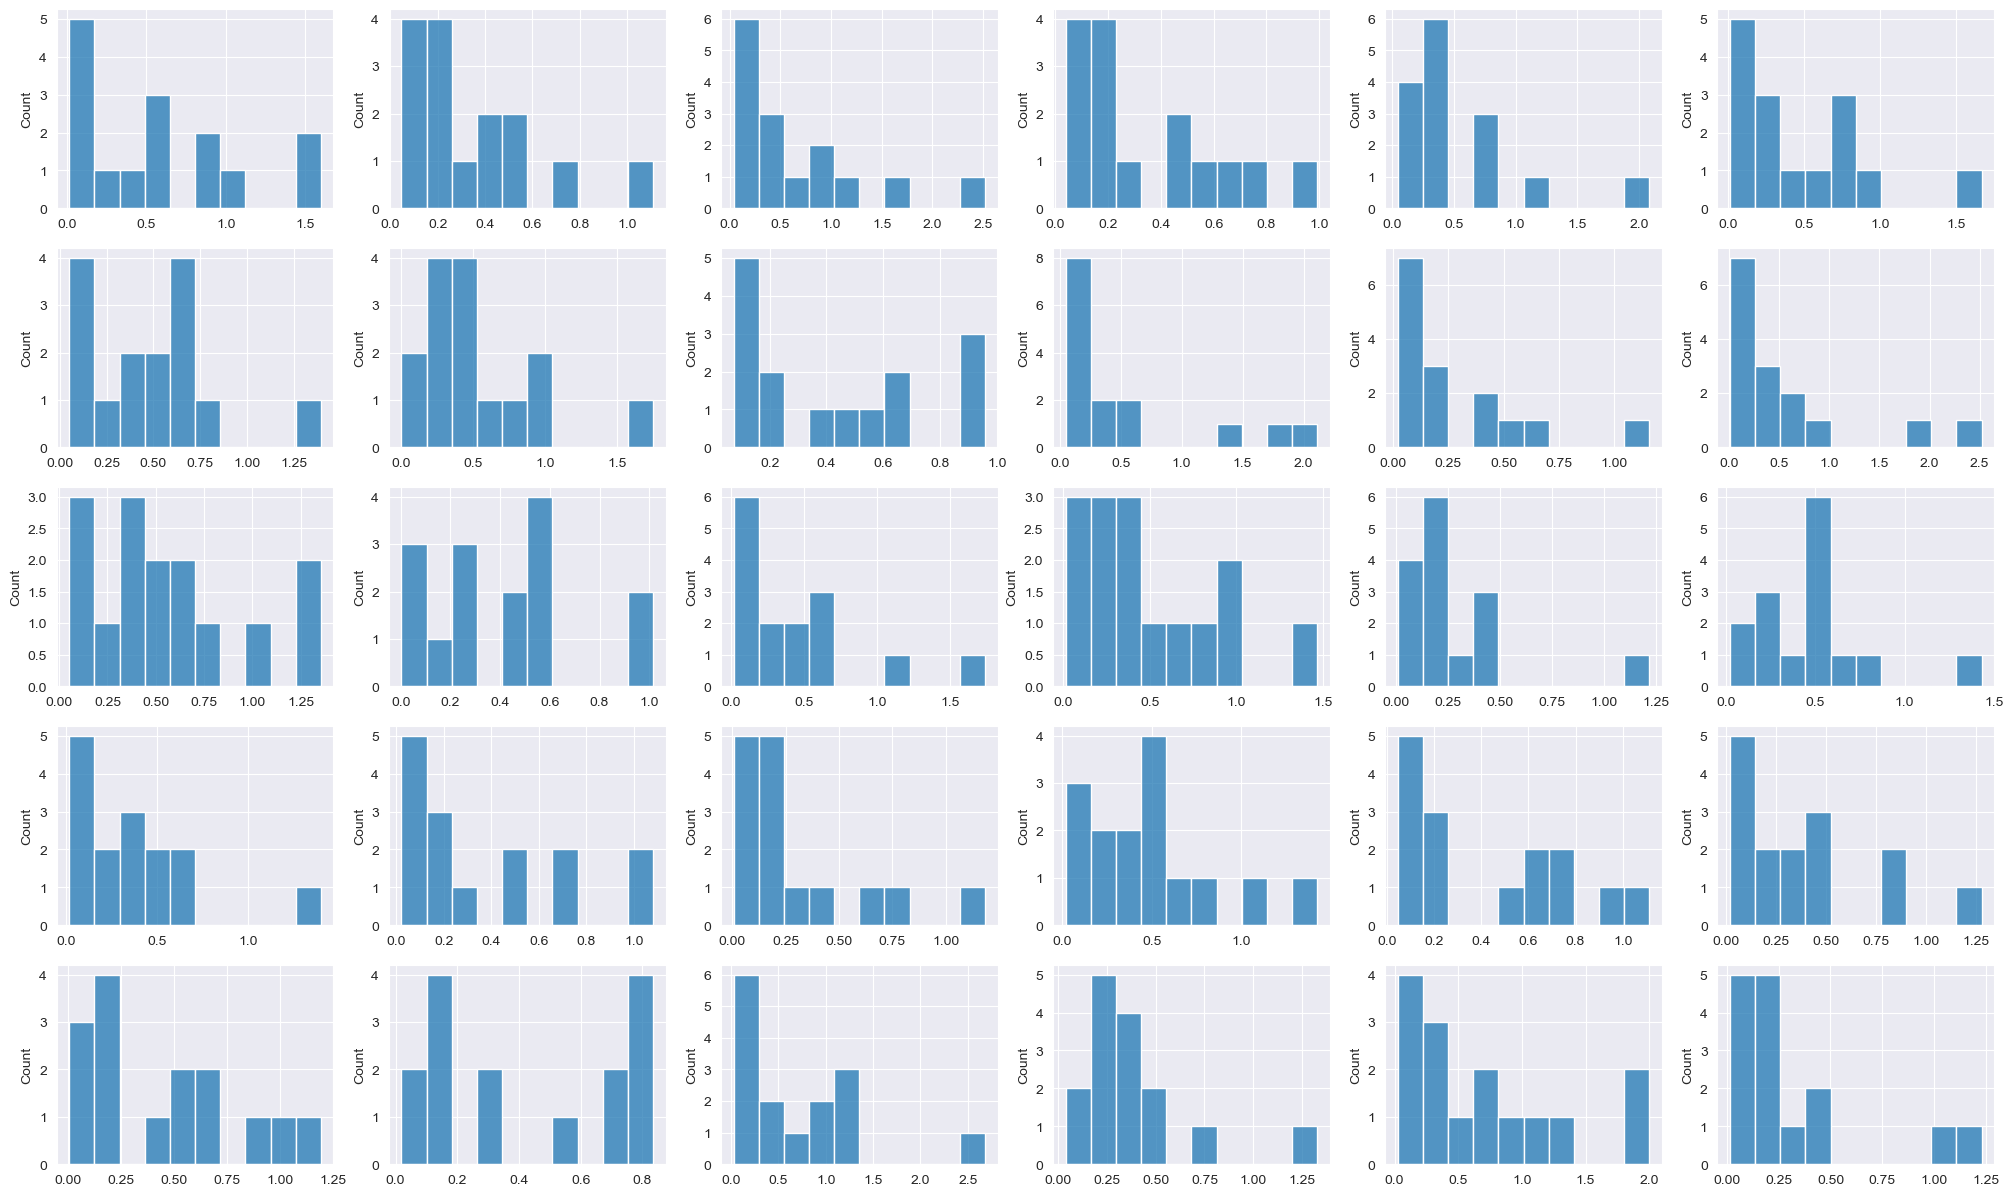

In [19]:
plt.rcParams["figure.figsize"] = (25,15)

for i in range(30):
    plt.subplot(5,6,i+1)
    sns.histplot(expd[i], bins=10)

In [20]:
#распределение средних

In [21]:
means_15 = [np.mean(x) for x in expd]
std = np.std(means_15)

In [22]:
std

0.11047507594350925

<AxesSubplot:ylabel='Count'>

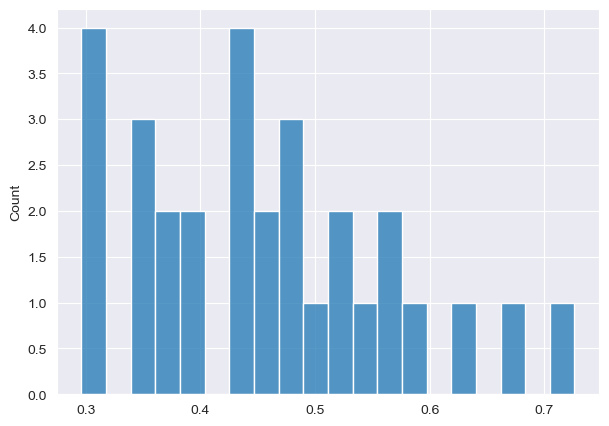

In [23]:
plt.rcParams["figure.figsize"] = (7,5)
sns.histplot(means_15, bins = 20)

In [24]:
expd = []

for i in range(30):
    random.seed(i)
    expd.append(np.random.exponential(scale = 0.5, size = 1500))

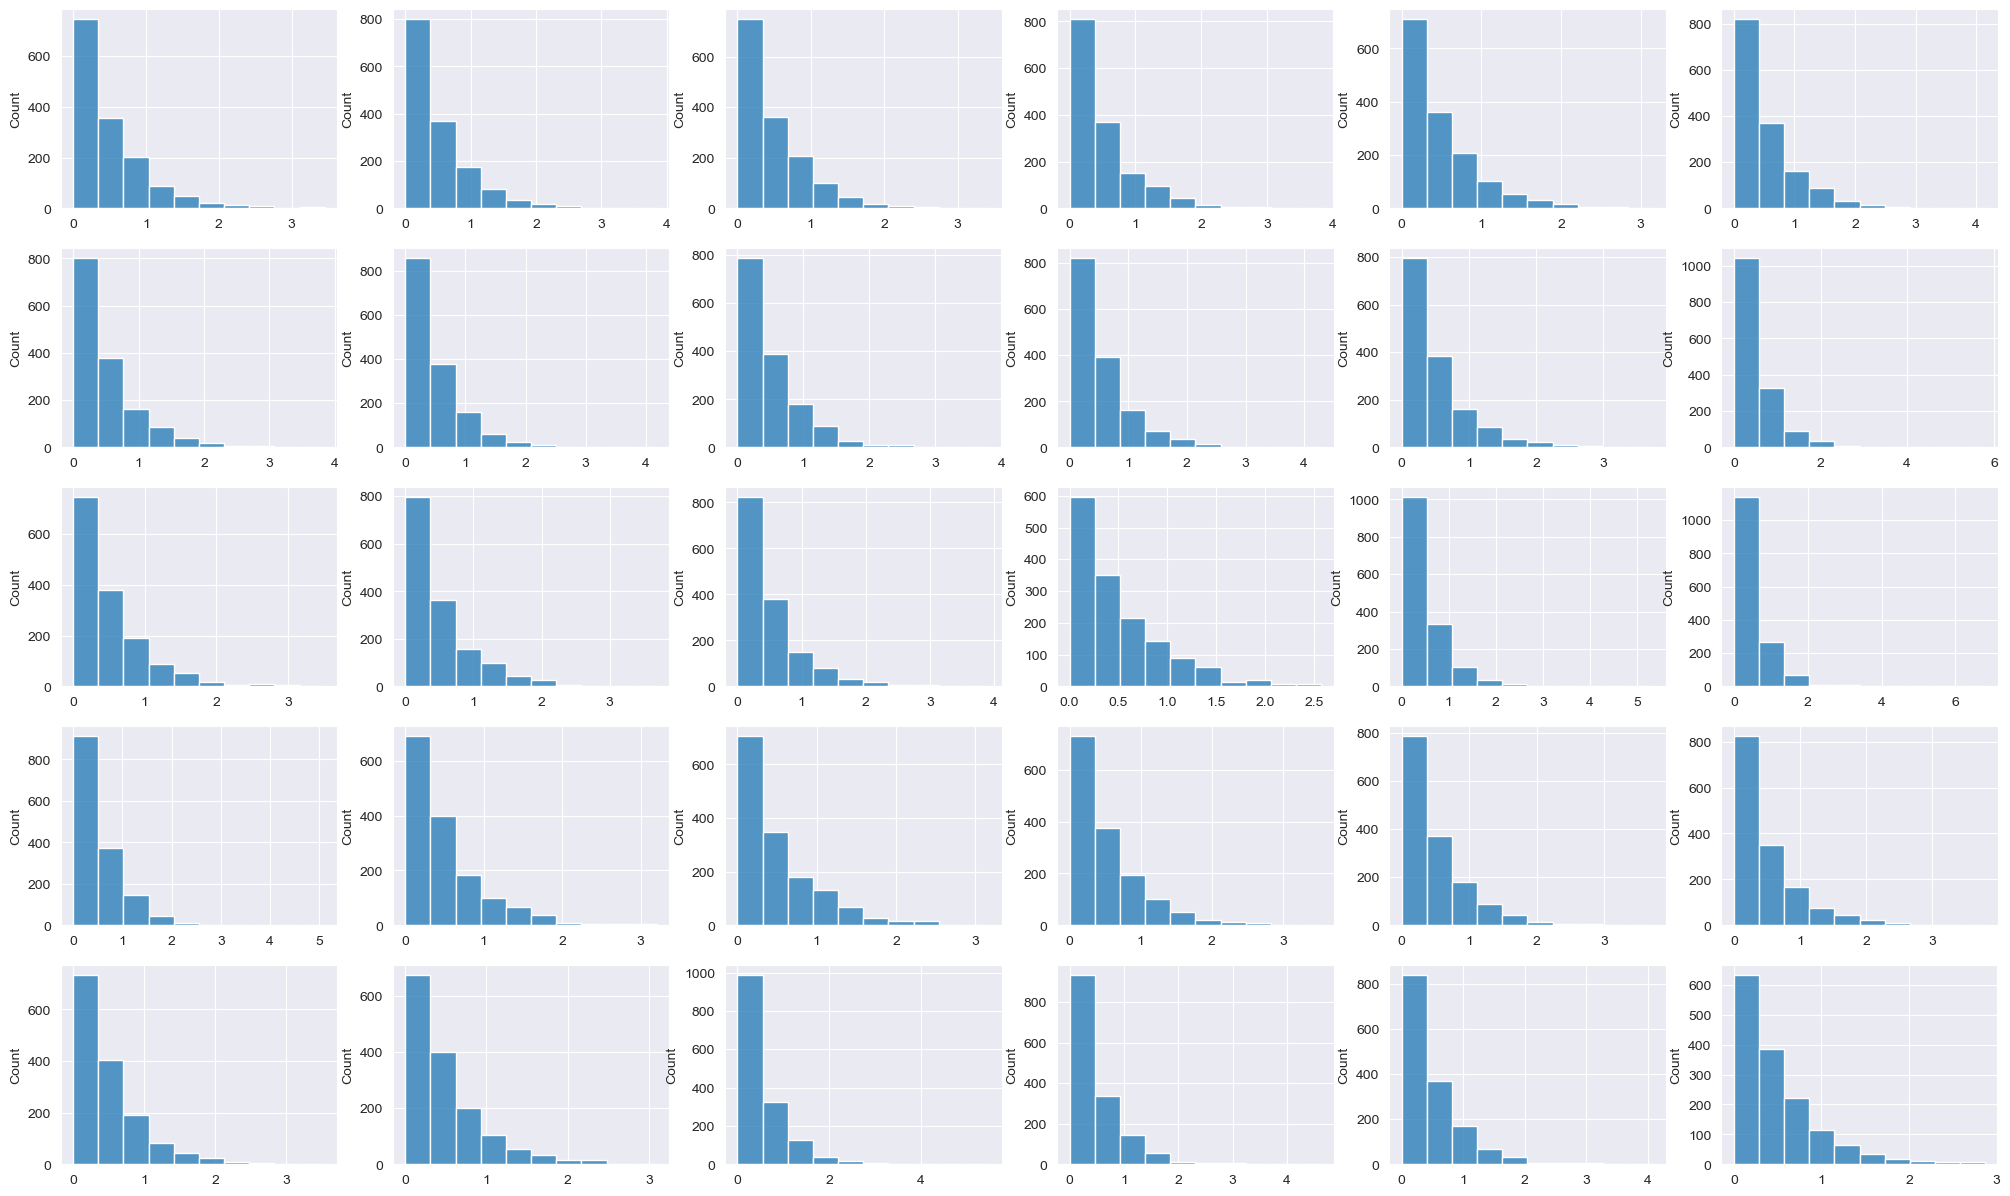

In [25]:
plt.rcParams["figure.figsize"] = (25,15)

for i in range(30):
    plt.subplot(5,6,i+1)
    sns.histplot(expd[i], bins=10)

In [26]:
#распределение средних

In [27]:
means_1500 = [np.mean(x) for x in expd]
std = np.std(means_1500)

In [28]:
std

0.01271424345921161

<AxesSubplot:ylabel='Count'>

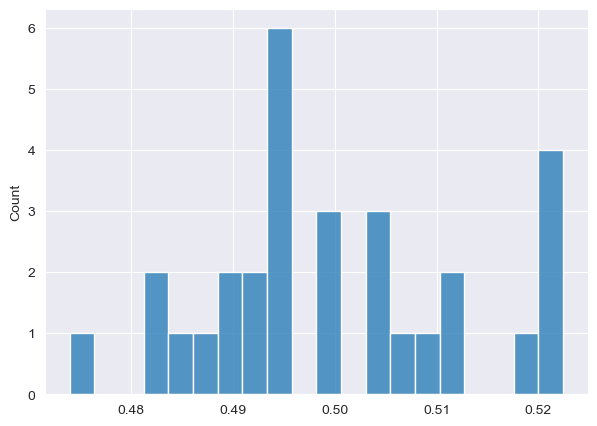

In [29]:
plt.rcParams["figure.figsize"] = (7,5)
sns.histplot(means_1500, bins = 20)

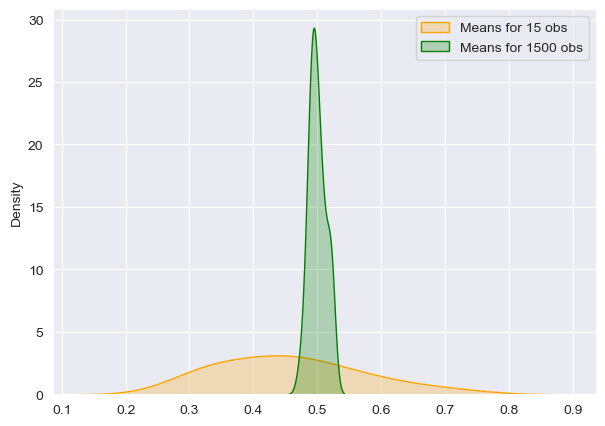

In [56]:
sns.kdeplot(means_15, color = 'orange', shade=True, label='Means for 15 obs')
sns.kdeplot(means_1500, color = 'green', shade=True, label='Means for 1500 obs')
plt.legend()

## Доверительные интервалы

In [33]:
#подвыборка роста 100 человек
heights = np.random.normal(loc=170, scale=16, size=100)

<AxesSubplot:ylabel='Count'>

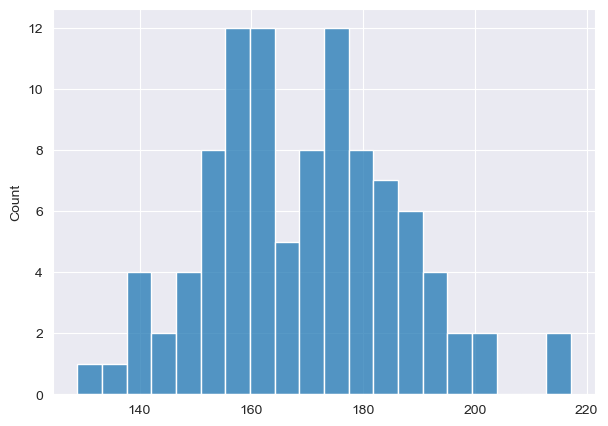

In [34]:
sns.histplot(heights, bins=20)

In [35]:
#рассчитаем 95% доверительный интервал
M = np.mean(heights)
sd = np.std(heights)
n = len(heights)
se = sd/np.sqrt(n)

x_left = M - se*1.96
x_right = M + se*1.96

In [36]:
x_left, x_right

(165.96072104191873, 172.60752172932277)

In [37]:
import scipy.stats as stat

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [38]:
conf = 0.95

np.abs(stat.norm.ppf((1-conf)/2))

1.959963984540054

In [39]:
stat.norm.cdf(1.96)

0.9750021048517795

In [40]:
#напишем функцию для вычисления доверительного интервала

def confindence_interval(sample, conf):
    M = np.mean(sample)
    sd = np.std(sample)
    n = len(sample)
    se = sd/np.sqrt(n)

    z = np.abs(stat.norm.ppf((1-conf)/2))
    x_left = M - se*z
    x_right = M + se*z
    return (x_left, x_right)

In [41]:
confindence_interval(heights, conf = 0.95)

(165.96078211017993, 172.60746066106157)

## Проверка статистических гипотез

Тестируем новый препарат от гриппа. Средняя скорость выздоровления составляет 14 дней. Предполагаем, что скорость выздоровления при приеме препарата составит менее 14 дней.

Пусть у нас 
* N=100 - тестовая группа 
* M=13 - средняя скорость выздоровления 
* sd=4 - стандартное отклонение 

**H_0**: M_0 = 14 \
**Н_1**: M_0 != 14

In [43]:
N = 100
sd = 4
m0 = 14
m = 13

In [44]:
se = sd/np.sqrt(N)

In [45]:
se

0.4

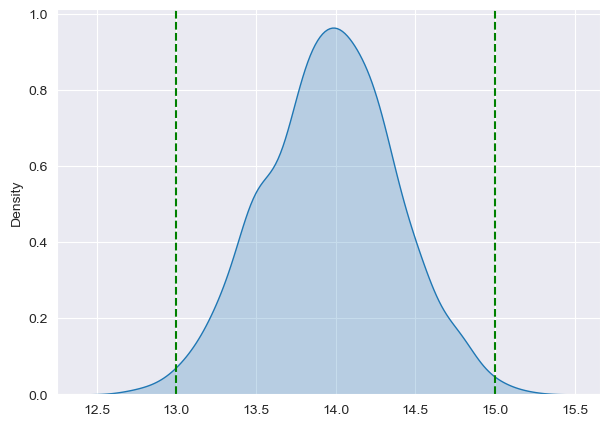

In [46]:
sns.kdeplot(np.random.normal(m0, se, 1000), shade=True)
plt.axvline(m, 0, 1, color = 'green', linestyle = '--')
plt.axvline(2*m0-m, 0, 1, color = 'green', linestyle = '--')

In [47]:
p_value = 2*stat.norm.cdf(x = m, loc = m0, scale = se)

In [48]:
p_value

0.012419330651552265